### 📄 Load and Preprocess Crystal Site Data

This step loads the CSV file with site information and processes it by combining specific site occupancy columns into standardized columns:  
- **R** combines `'2a'`, `'6h (1)'`, and `'12k'`  
- **X** maps from `'6h (2)'`  
- **M** maps from `'2c'`  
The `process_csv` function parses element counts and merges them into a unified chemical formula per group.

In [1]:
from utils.preprocess import process_csv

rename_map = {
    "R": ["2a", "6h (1)", "12k"],
    "X": ["6h (2)"],
    "M": ["2c"] 
}

df = process_csv("data/Cd3Y10Ru-hP28_merged.csv", rename_map)
df

,Filename,Formula,Notes,R,X,M
0,1722765.cif,Cd3RuTm10,NaN,Tm3.0,Cd,Ru
1,1722761.cif,Cd3RuTb10,NaN,Tb3.0,Cd,Ru
2,1722767.cif,Cd3RhY10,NaN,Y3.0,Cd,Rh
3,1147119.cif,Cd3RhTm10,NaN,Tm3.0,Cd,Rh
4,1147127.cif,Cd3PtY10,NaN,Y3.0,Cd,Pt
...,...,...,...,...,...,...
76,1532710.cif,Al3CoLu10,NaN,Lu3.0,Al,Co
77,1147152.cif,Al3CoHo10,NaN,Ho3.0,Al,Co
78,1147153.cif,Al3CoEr10,NaN,Er3.0,Al,Co
79,1147151.cif,Al3CoDy10,NaN,Dy3.0,Al,Co


Generate the features for each site

For sites with mixing, weighted features are generated

In [2]:
from utils.feature import process_features

element_features_excel = "data/elemental-property-list.xlsx"

df_site_features = process_features(df, element_features_excel)

df_site_features

,Filename,Formula,Site,Site_Label,Atomic weight,Atomic number,Period,Group,quantum number l,Metal(1)/ metalloid(2)/ nonmetal(3),...,DFT RLDA Ekin,DFT RLDA Ecoul,DFT RLDA Eenuc,DFT RLDA Exc,DFT ScRLDA Etot,DFT ScRLDA Ekin,DFT ScRLDA Ecoul,DFT ScRLDA Eenuc,DFT ScRLDA Exc,Neutron Cross Section
0,1722765.cif,Cd3RuTm10,Tm3.0,R,168.934210,69.0,6.0,3.0,3.0,1.0,...,14952.782514,5325.995668,-33574.513283,-253.523438,-13534.832864,14663.344745,5311.599603,-33257.081306,-252.695905,105.000
1,1722765.cif,Cd3RuTm10,Ru,M,101.070000,44.0,5.0,8.0,2.0,1.0,...,4693.065137,1846.844764,-10938.009162,-123.446179,-4520.768581,4662.961423,1844.917123,-10905.397430,-123.249697,2.600
2,1722765.cif,Cd3RuTm10,Cd,X,112.411000,48.0,5.0,12.0,0.0,1.0,...,5839.236393,2265.151850,-13545.979295,-142.057637,-5582.286913,5793.217213,2262.334423,-13496.044867,-141.793682,2450.000
3,1722761.cif,Cd3RuTb10,Tb3.0,R,158.925340,65.0,6.0,3.0,3.0,1.0,...,12744.671952,4565.424762,-28772.145665,-229.073799,-11681.366585,12532.655261,4554.327455,-28539.978120,-228.371181,23.000
4,1722761.cif,Cd3RuTb10,Ru,M,101.070000,44.0,5.0,8.0,2.0,1.0,...,4693.065137,1846.844764,-10938.009162,-123.446179,-4520.768581,4662.961423,1844.917123,-10905.397430,-123.249697,2.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,1147151.cif,Al3CoDy10,Co,M,58.933200,27.0,4.0,9.0,2.0,1.0,...,1407.710690,592.105098,-3333.731437,-55.780174,-1389.663179,1404.758937,591.861977,-3330.539729,-55.744364,37.200
239,1147151.cif,Al3CoDy10,Al,X,26.981539,13.0,3.0,13.0,1.0,1.0,...,241.729117,112.827267,-578.851985,-17.373722,-241.669101,241.640910,112.816539,-578.755072,-17.371477,0.233
240,1722740.cif,Cd3Y10Ru,Y3.0,R,88.905840,39.0,5.0,3.0,2.0,1.0,...,3476.837608,1398.703210,-8151.743067,-101.827955,-3377.673981,3460.017556,1397.559798,-8133.552916,-101.698418,1.280
241,1722740.cif,Cd3Y10Ru,Ru,M,101.070000,44.0,5.0,8.0,2.0,1.0,...,4693.065137,1846.844764,-10938.009162,-123.446179,-4520.768581,4662.961423,1844.917123,-10905.397430,-123.249697,2.600


Running PLS-DA with 2 components

Preprocesing:
 * External scaling - `StandardScaler` and `MinMaxScaler`
 * Without internal scaling

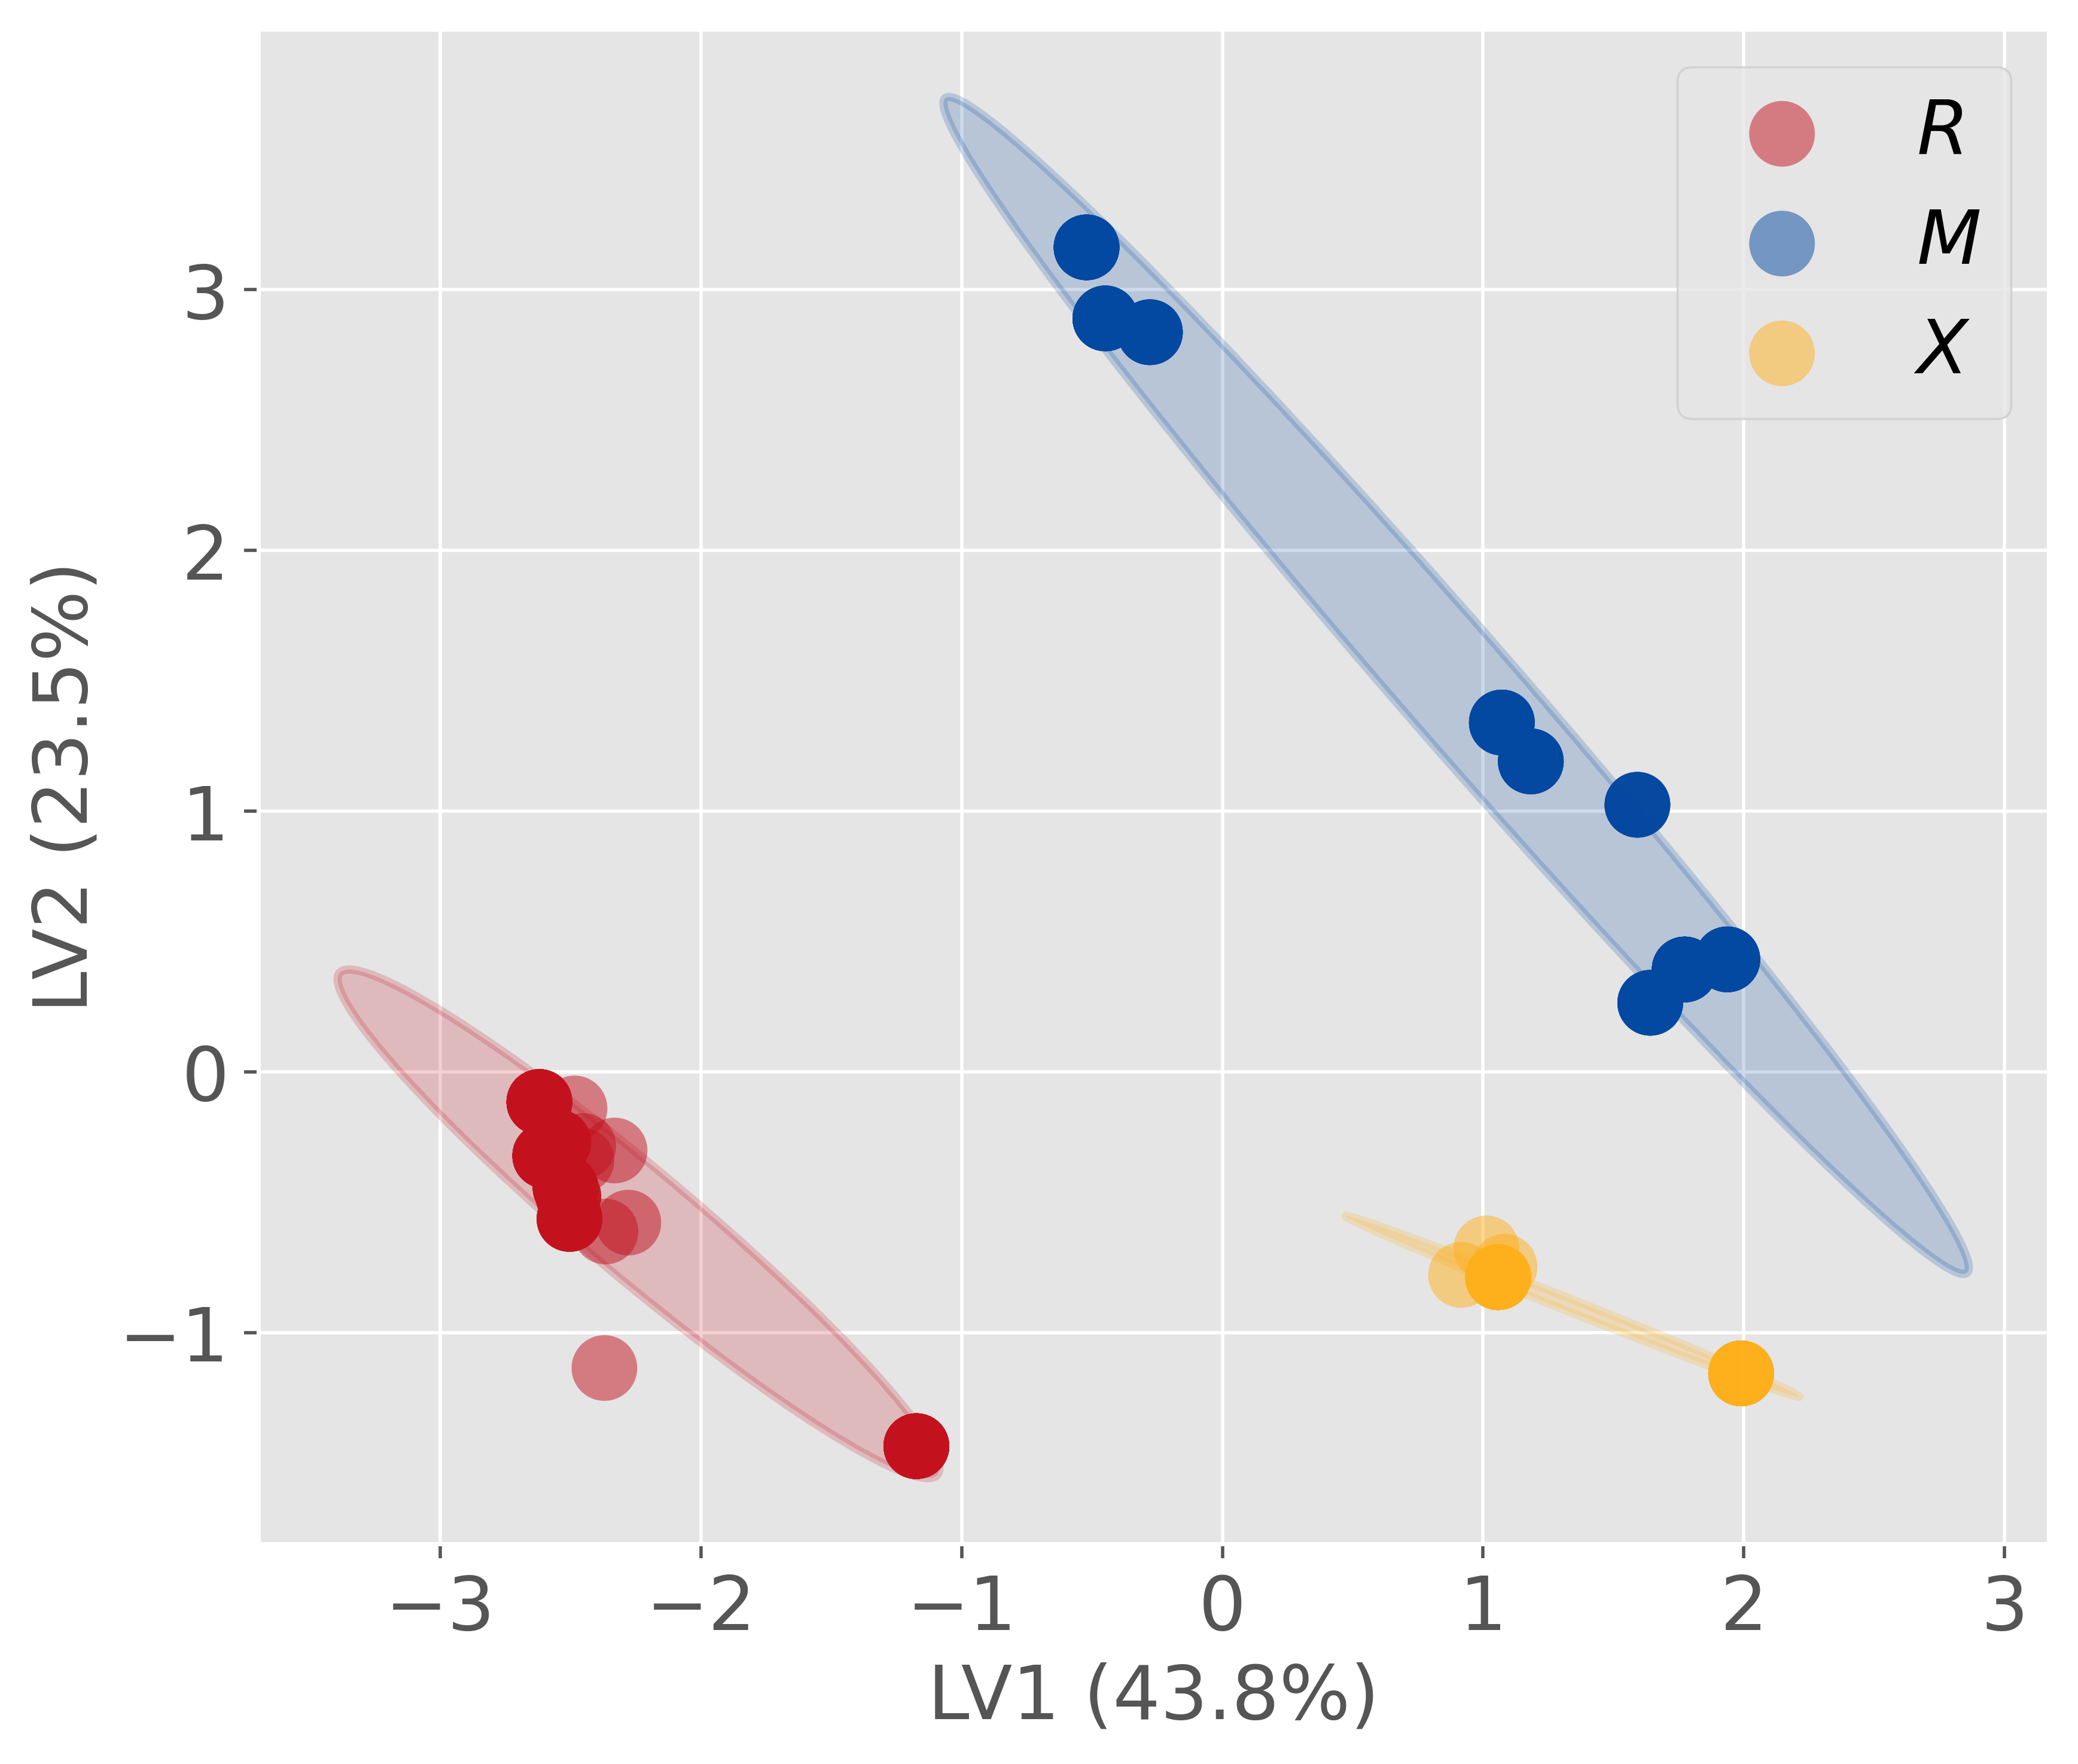

Full loadings saved to PLS_DA_Full_Loadings.xlsx.


In [3]:
from models.plsda import run_pls_da

pls_loadings = run_pls_da(df_site_features)

Common features between property file and PLS‑DA: ['Atomic weight', 'Atomic number', 'Period', 'Group', 'quantum  number l', 'Metal(1)/ metalloid(2)/ nonmetal(3)', 'Mendeleev number', 'Families', 'valence s', 'valence p', 'valence d', 'valence f', 'unfilled s', 'unfilled p', 'unfilled d', 'unfilled f', 'no. of  valence  electrons', 'outer shell electrons', 'Gilman no. of valence electrons', 'Metallic  valence', 'Zeff', '1st Bohr radius (a0)', 'Ionization energy (eV)', 'Electron affinity (ev)', 'Pauling EN', 'Martynov Batsanov EN', 'Mulliken EN', 'Allred EN', 'Allred Rockow EN', 'Nagle EN', 'Ghosh EN', 'Atomic radius calculated', 'Covalent radius', 'Ionic radius', 'Effective ionic radius', 'Miracle radius', 'van der Waals radius', 'Zunger radii sum', 'Crystal radius', 'Covalent CSD radius', 'Slater radius', 'Orbital radius', 'polarizability, A^3', 'Melting point, K', 'Boiling point, K', 'Density,  g/mL', 'Specific heat, J/g K', 'Heat of fusion,  kJ/mol', 'Heat of vaporization,  kJ/mol',

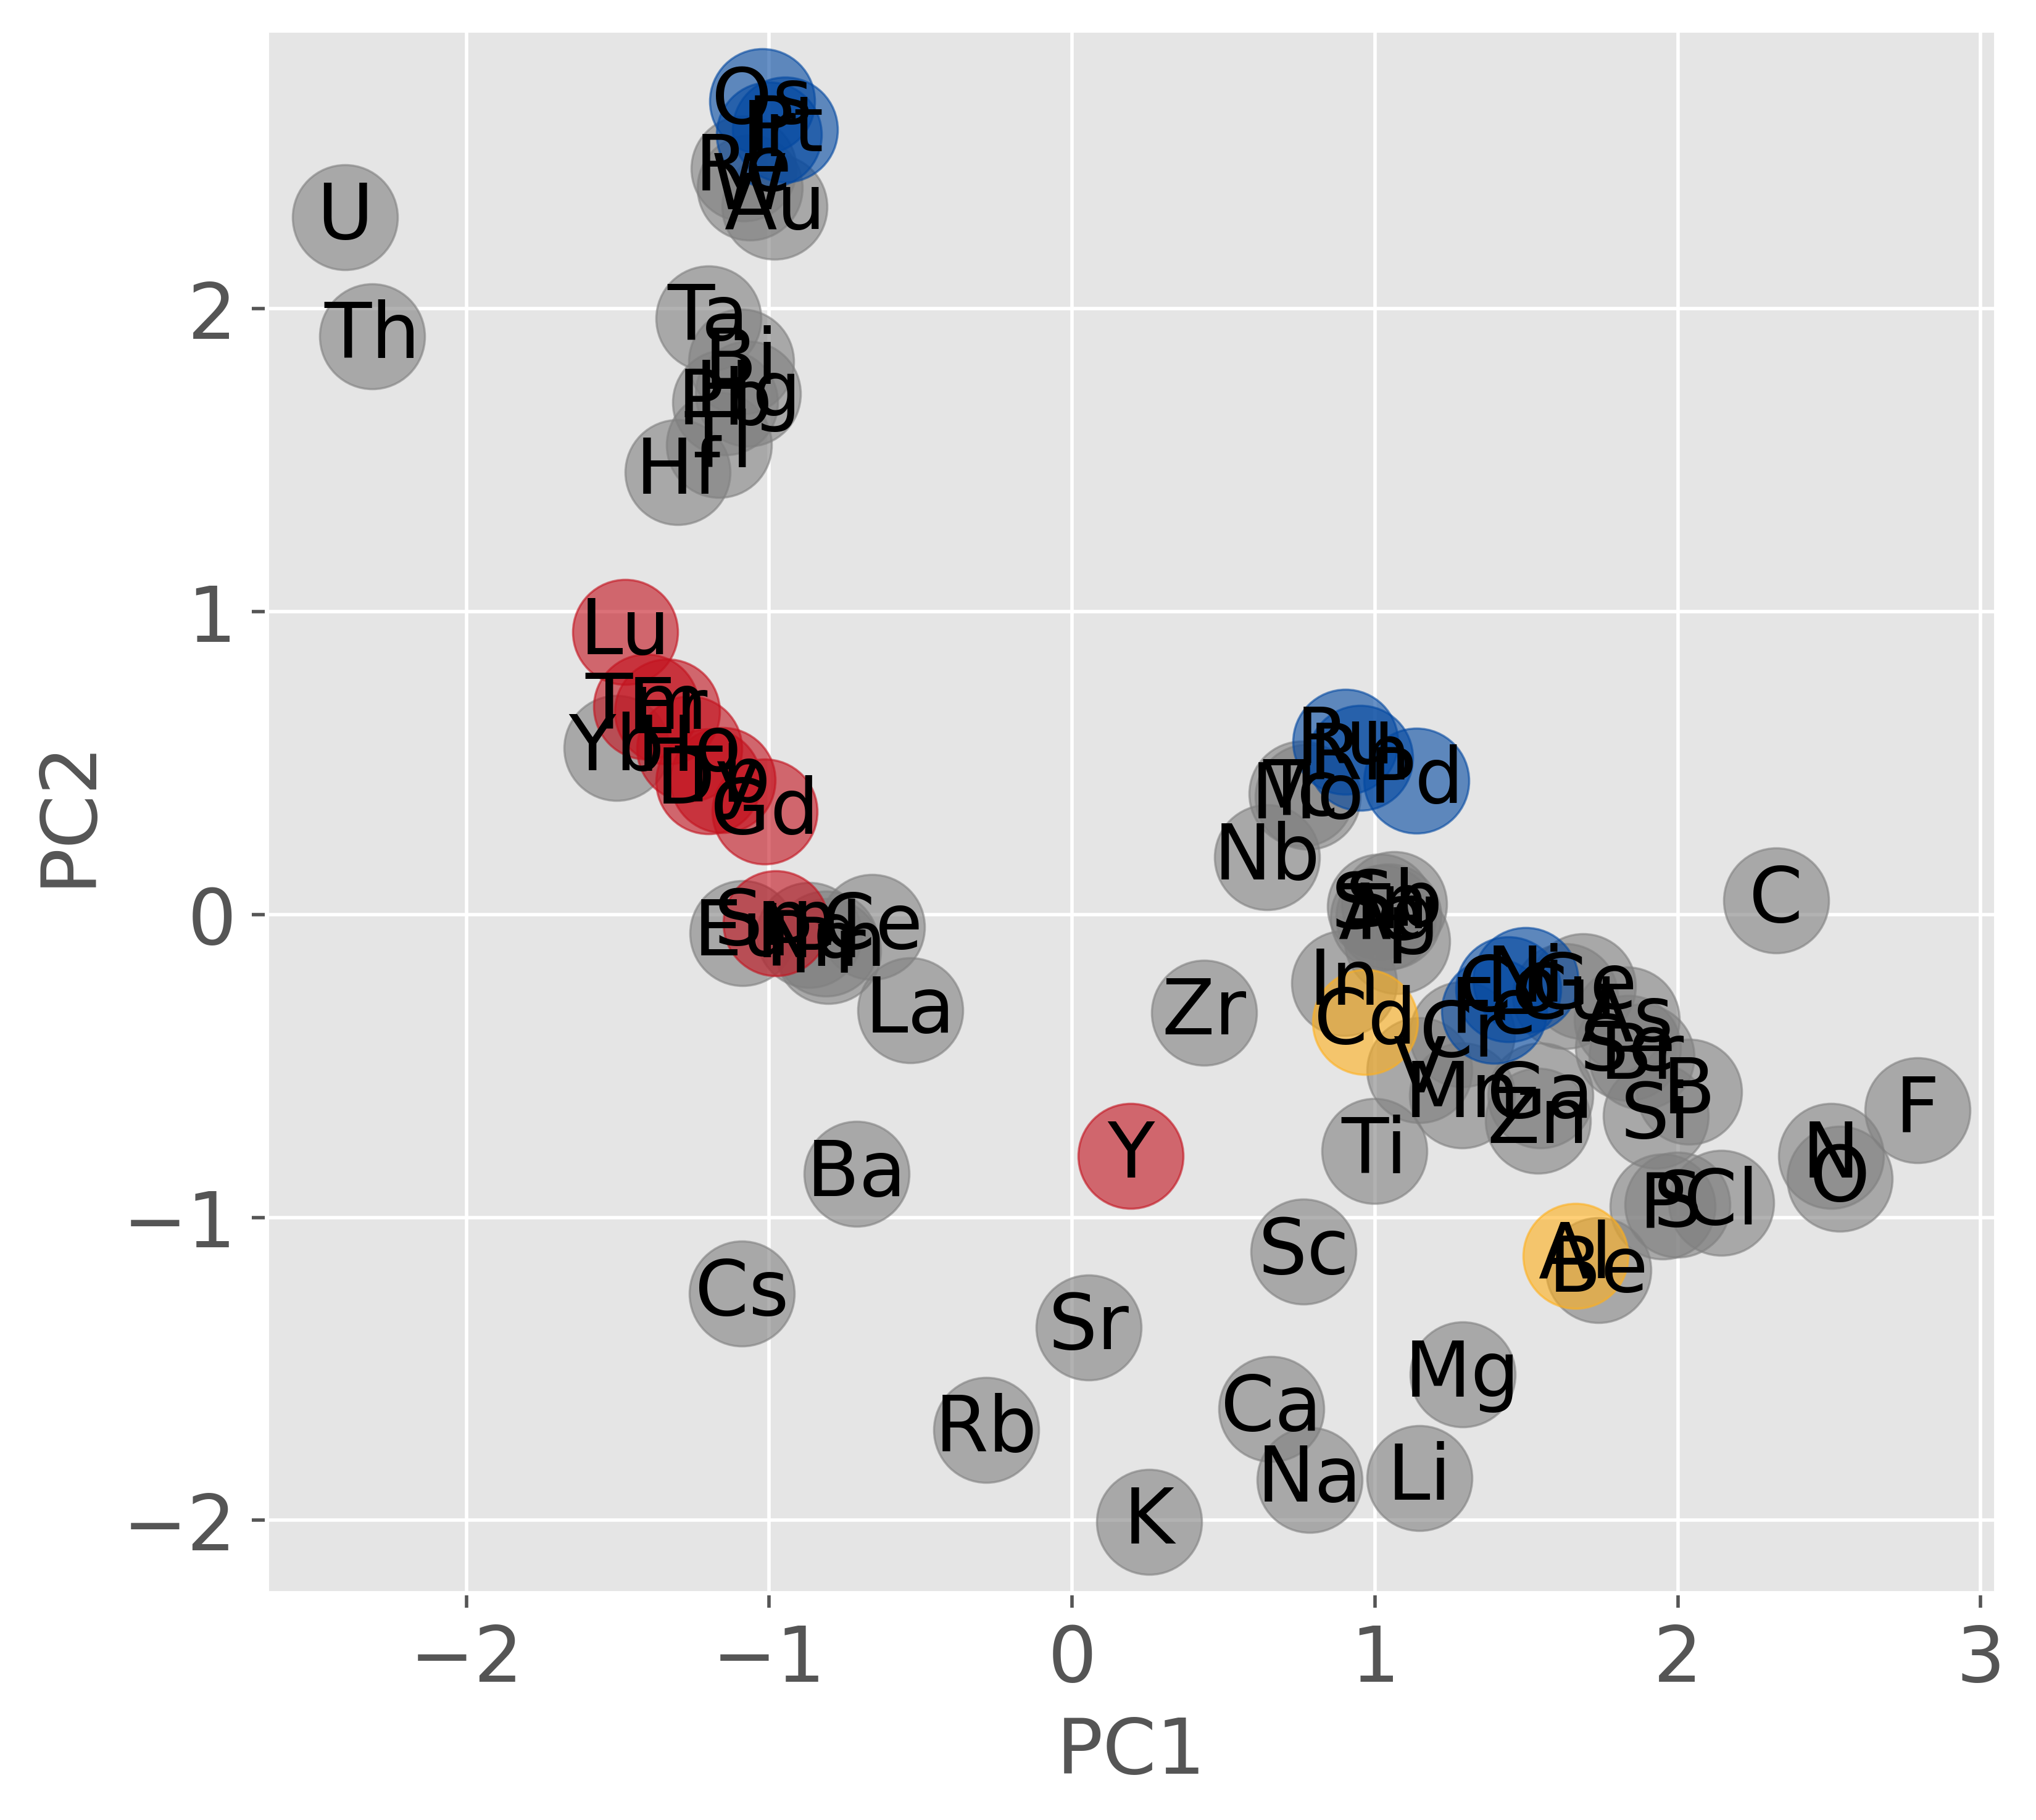

Coordinates saved to outputs/coordinates.xlsx


In [4]:
from models.projection import plot_elements_from_plsda_loadings

coords = plot_elements_from_plsda_loadings(pls_loadings, df)

/Users/danila/Documents/GitHub/STEx-ternary/models/visualization.py:207: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


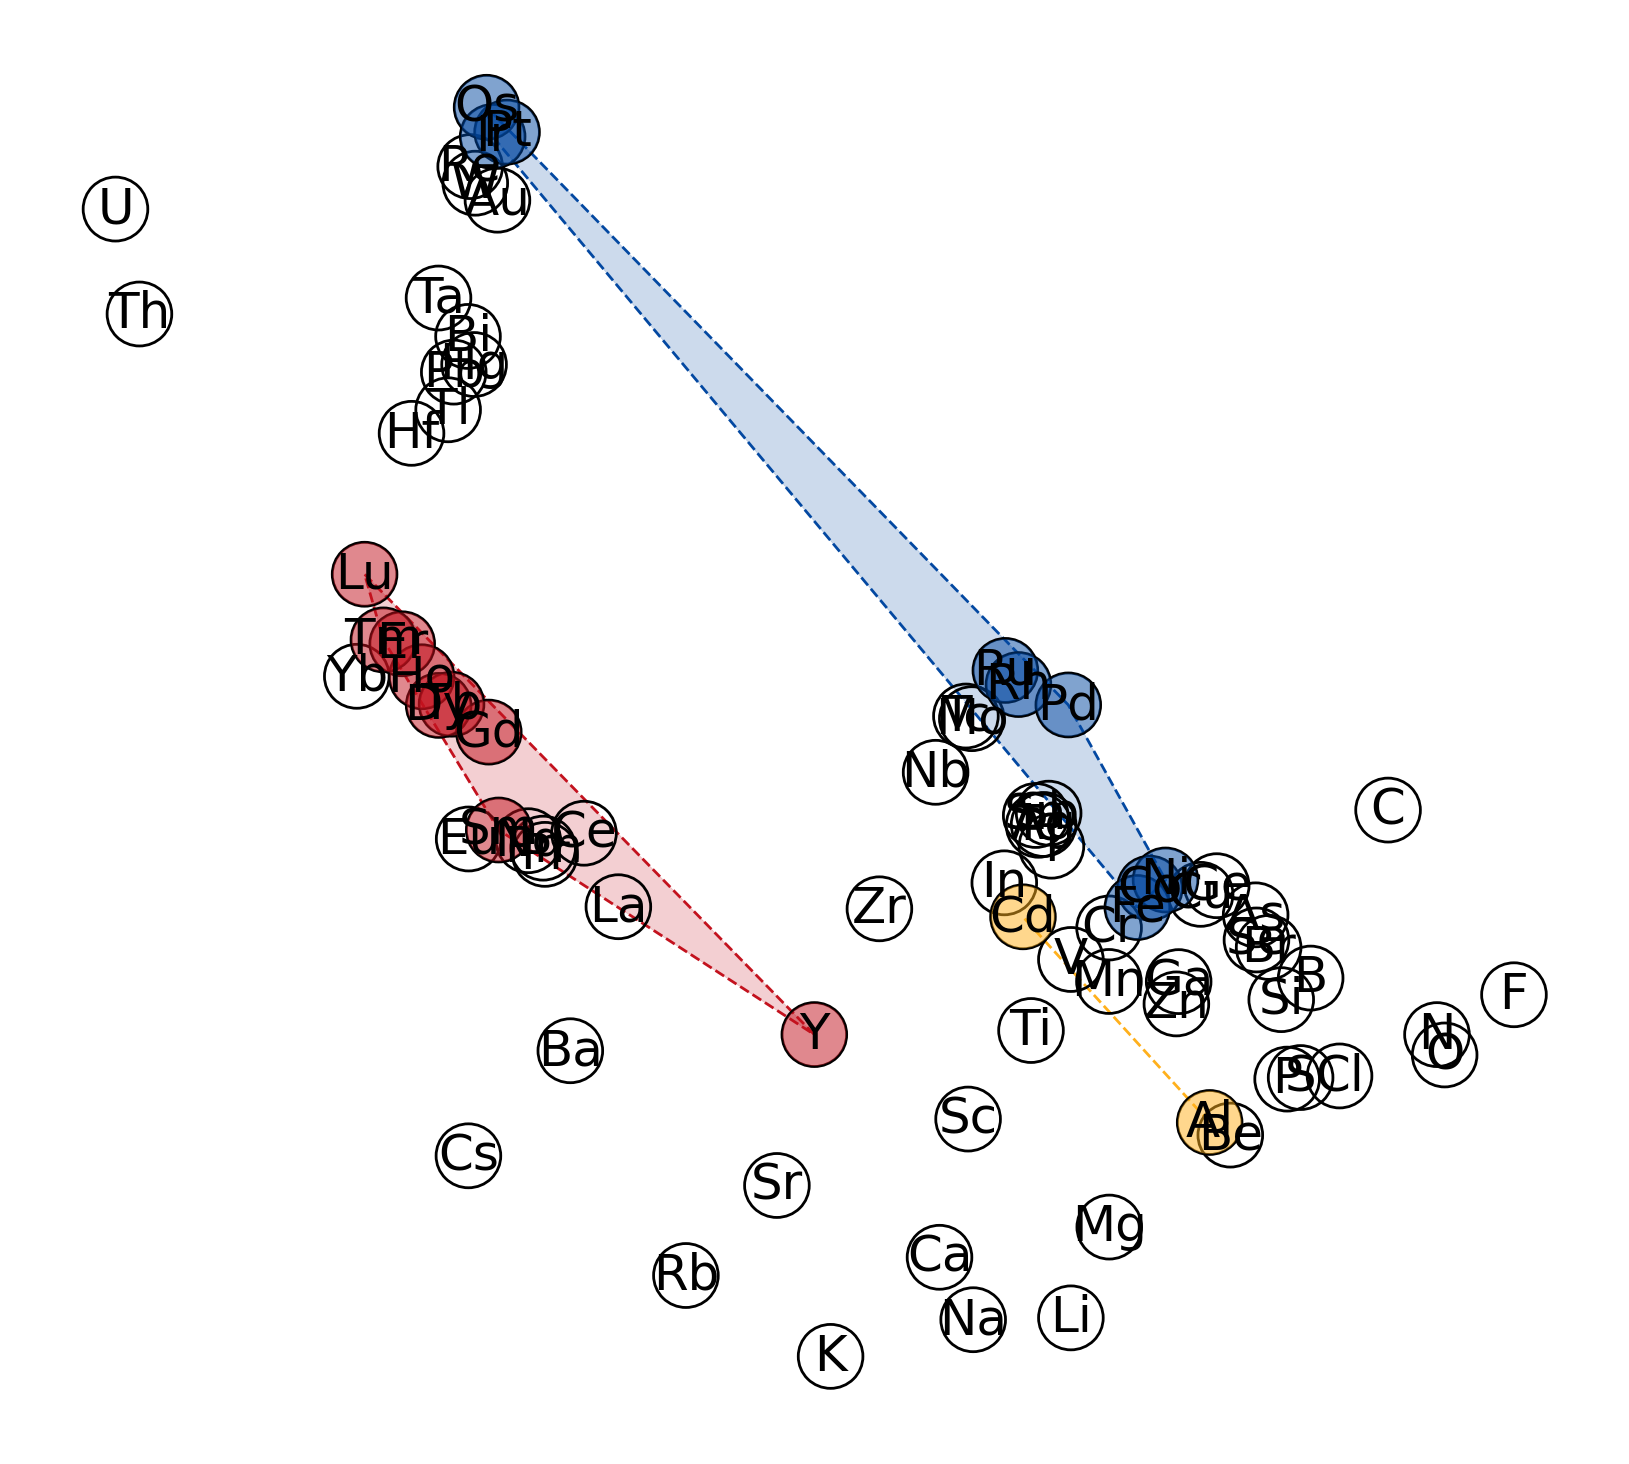

In [5]:
from models.visualization import visualize_elements

visualize_elements(coords, df, compounds_markers=False)

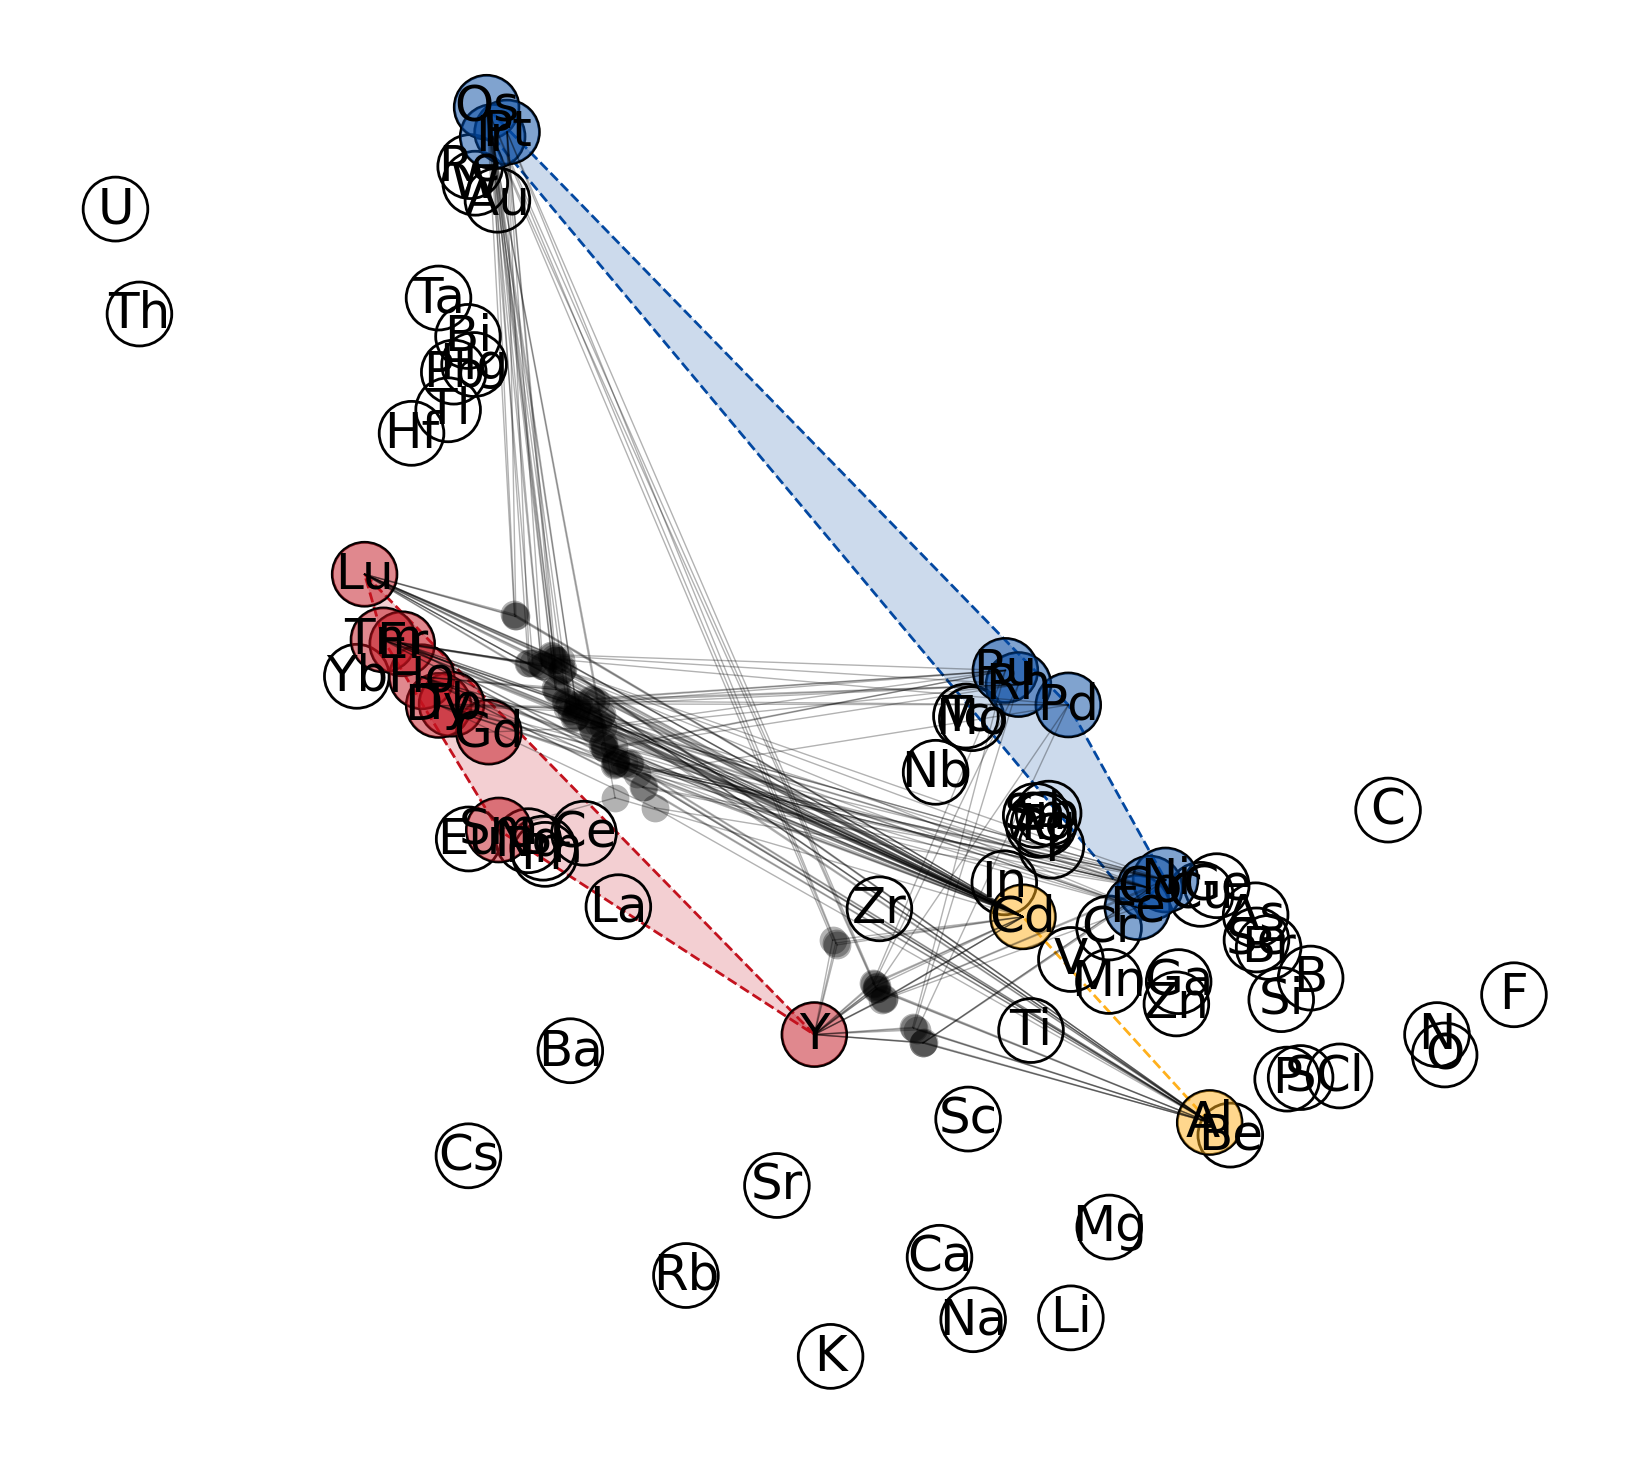

In [6]:
visualize_elements(coords, df, compounds_markers=True)

In [7]:
from models.recommendation import recommendation_engine, best_recommendation, add_candidate
fixed = {"M": "Ru", 
         "X": "Cd"
         } 

recommendations_df = recommendation_engine(fixed, df, coordinate_file="outputs/coordinates.xlsx")
                                            
print(recommendations_df)

Recommendations saved to 'recommendations.xlsx'.
  Element_rec1  Value_rec1 Element_rec2  Value_rec2 Element_rec3  Value_rec3
0           Yb       1.000           Gd       1.000           Gd       1.000
1           Gd       0.972           Sm       0.344           Sm       0.344
2           Sm       0.335                      NaN           Nd       0.296
3           Eu       0.331                      NaN           Pm       0.272
4           Zr       0.318                      NaN           Pr       0.262
5           Hf       0.303                      NaN           Ce       0.251
6           Sr       0.289                      NaN           La       0.199
7           Nd       0.287                      NaN                      NaN
8           Pm       0.264                      NaN                      NaN
9           Sc       0.258                      NaN                      NaN


In [8]:
best_candidate = best_recommendation(recommendations_df)

Common candidates with average scores:
  Gd: 0.9906666666666667
  Sm: 0.341


In [9]:
add_candidate(df,fixed, best_candidate)

New candidate rows added to the DataFrame.


,Filename,Formula,Notes,R,X,M
0,1722765.cif,Cd3RuTm10,NaN,Tm3.0,Cd,Ru
1,1722761.cif,Cd3RuTb10,NaN,Tb3.0,Cd,Ru
2,1722767.cif,Cd3RhY10,NaN,Y3.0,Cd,Rh
3,1147119.cif,Cd3RhTm10,NaN,Tm3.0,Cd,Rh
4,1147127.cif,Cd3PtY10,NaN,Y3.0,Cd,Pt
...,...,...,...,...,...,...
78,1147153.cif,Al3CoEr10,NaN,Er3.0,Al,Co
79,1147151.cif,Al3CoDy10,NaN,Dy3.0,Al,Co
80,1722740.cif,Cd3Y10Ru,NaN,Y3.0,Cd,Ru
81,new_candidate.cif,Cd3RuGd10,candidate,Gd,Cd,Ru


/Users/danila/Documents/GitHub/STEx-ternary/models/visualization.py:207: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


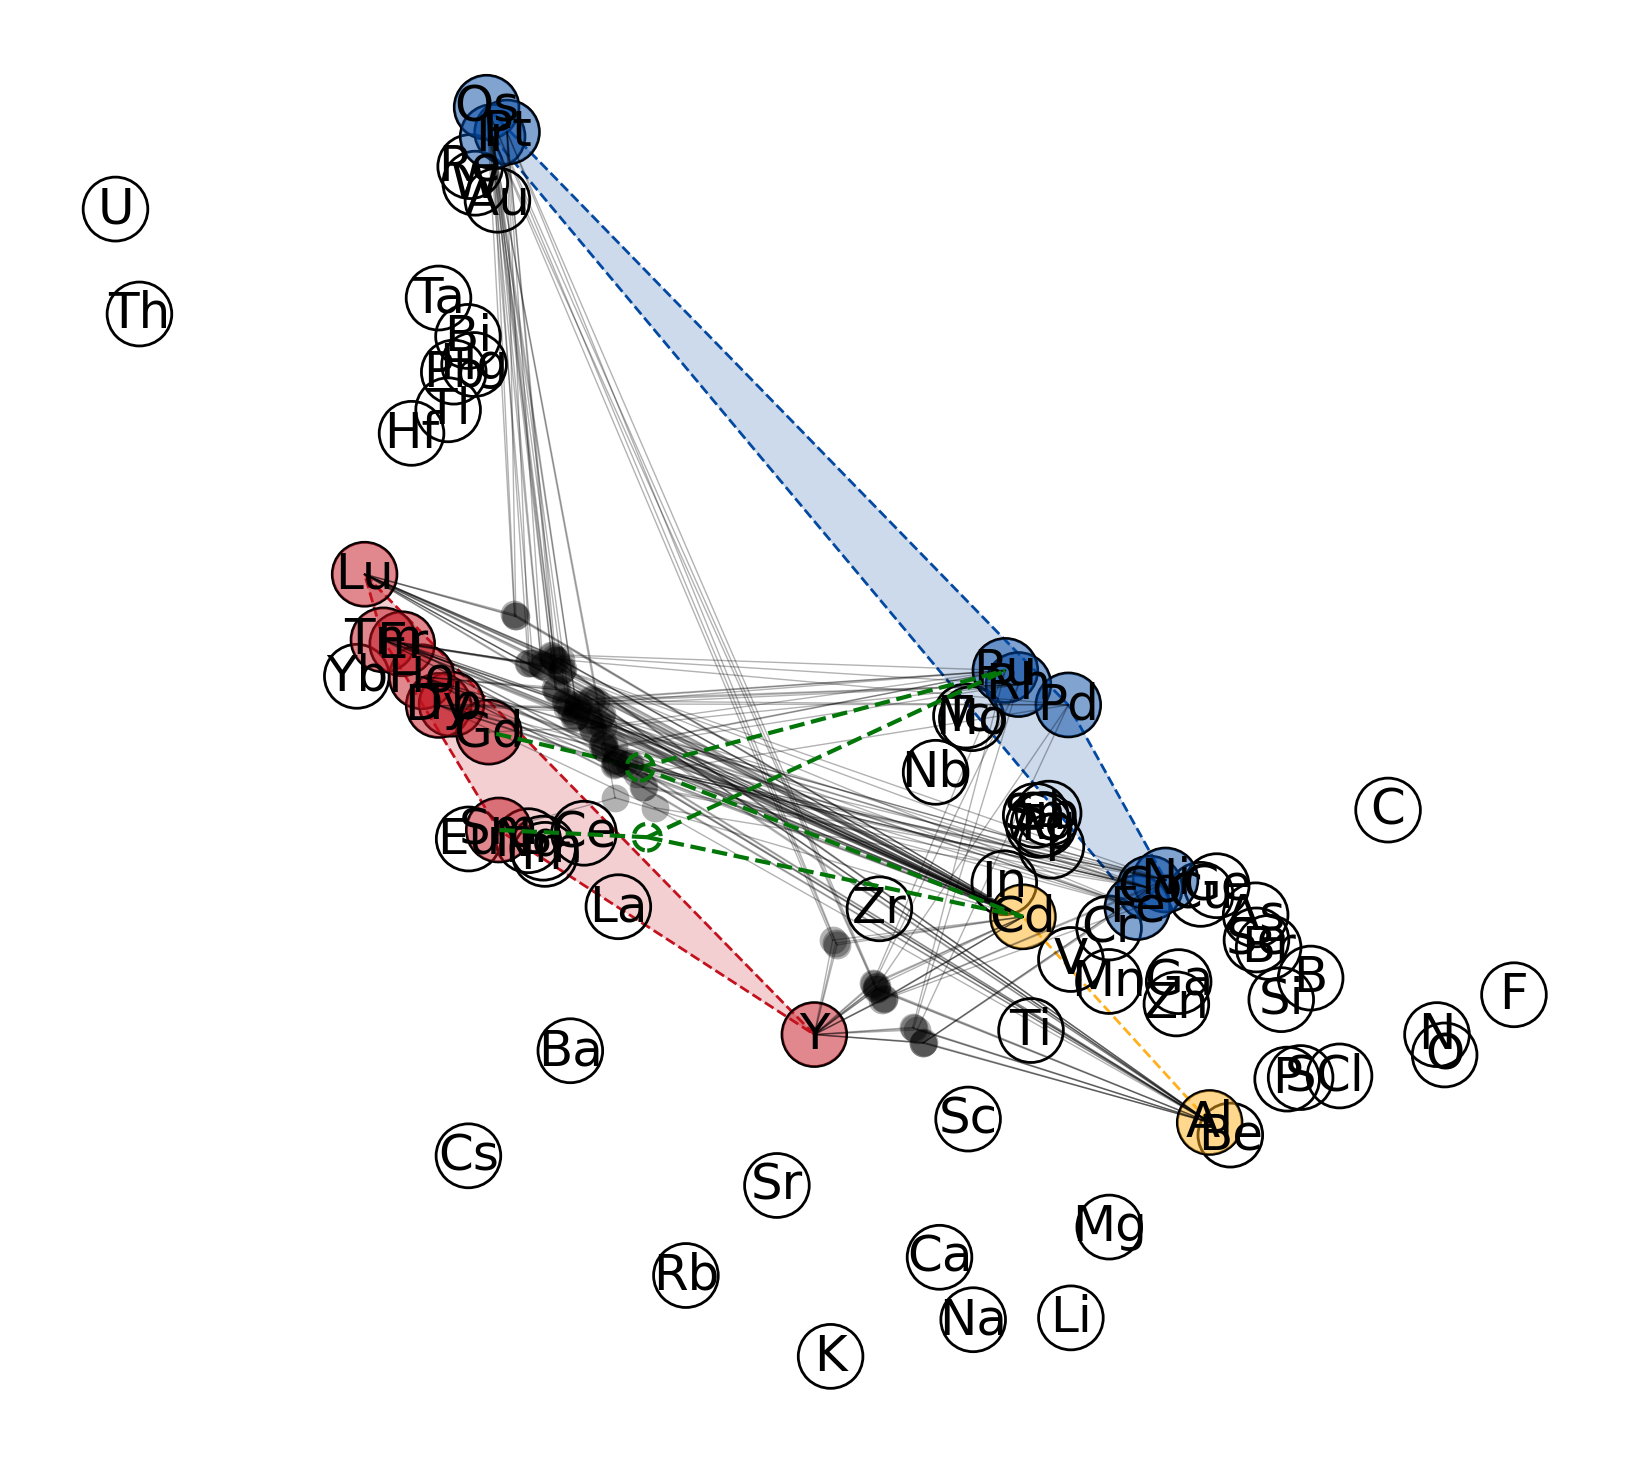

In [10]:
visualize_elements(coords, df, compounds_markers=True)